In [1]:
DATA_PATH = "C:/Users/ltk65/Downloads/scu-ai-competition-202401/"
DATA_PATH

'C:/Users/ltk65/Downloads/scu-ai-competition-202401/'

In [2]:
SEED = 42

In [3]:
import pandas as pd
import numpy as np

train = pd.read_csv(f"{DATA_PATH}train.csv") # 학습데이터
test = pd.read_csv(f"{DATA_PATH}test.csv") # 테스트 데이터
train.shape , test.shape

((4223, 18), (3456, 17))

In [4]:
train.head()


,ID,나이,성별,티록신_복용_여부,항갑상선제_복용_여부,지병_여부,임신_여부,갑상선_수술_이력,I131_치료_여부,갑상선저하_인지_여부,갑상선항진증_인지_여부,리튬_치료_여부,갑상선종_여부,종양_여부,TSH,FreeT3,FreeT4,target
0,train_0,59.0,남,아니오,아니오,아니오,아니오,아니오,아니오,아니오,아니오,아니오,아니오,아니오,NaN,NaN,0.77,0
1,train_1,63.0,남,아니오,아니오,아니오,아니오,아니오,아니오,아니오,아니오,아니오,아니오,아니오,33.0,1.5,NaN,1
2,train_2,65.0,여,아니오,아니오,아니오,아니오,아니오,아니오,아니오,아니오,아니오,아니오,아니오,1.7,2.3,0.95,0
3,train_3,33.0,남,아니오,아니오,예,아니오,아니오,아니오,아니오,아니오,아니오,아니오,아니오,6.2,NaN,0.66,0
4,train_4,64.0,여,예,아니오,아니오,아니오,아니오,아니오,아니오,아니오,아니오,아니오,아니오,1.2,NaN,0.95,0


In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4223 entries, 0 to 4222
Data columns (total 18 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   ID            4223 non-null   object 
 1   나이            4220 non-null   float64
 2   성별            4086 non-null   object 
 3   티록신_복용_여부     4223 non-null   object 
 4   항갑상선제_복용_여부   4223 non-null   object 
 5   지병_여부         4223 non-null   object 
 6   임신_여부         4223 non-null   object 
 7   갑상선_수술_이력     4223 non-null   object 
 8   I131_치료_여부    4223 non-null   object 
 9   갑상선저하_인지_여부   4223 non-null   object 
 10  갑상선항진증_인지_여부  4223 non-null   object 
 11  리튬_치료_여부      4223 non-null   object 
 12  갑상선종_여부       4223 non-null   object 
 13  종양_여부         4223 non-null   object 
 14  TSH           3832 non-null   float64
 15  FreeT3        2989 non-null   float64
 16  FreeT4        3854 non-null   float64
 17  target        4223 non-null   int64  
dtypes: float64(4), int64(1), obj

In [6]:
train["target"].mean()

0.11816244376035993

In [7]:
train.isnull().sum()

ID                 0
나이                 3
성별               137
티록신_복용_여부          0
항갑상선제_복용_여부        0
지병_여부              0
임신_여부              0
갑상선_수술_이력          0
I131_치료_여부         0
갑상선저하_인지_여부        0
갑상선항진증_인지_여부       0
리튬_치료_여부           0
갑상선종_여부            0
종양_여부              0
TSH              391
FreeT3          1234
FreeT4           369
target             0
dtype: int64

In [8]:
test.isnull().sum()

ID                0
나이                1
성별              117
티록신_복용_여부         0
항갑상선제_복용_여부       0
지병_여부             0
임신_여부             0
갑상선_수술_이력         0
I131_치료_여부        0
갑상선저하_인지_여부       0
갑상선항진증_인지_여부      0
리튬_치료_여부          0
갑상선종_여부           0
종양_여부             0
TSH             333
FreeT3          975
FreeT4          312
dtype: int64

In [9]:
fill_tsh = train["TSH"].median()
fill_free_t3 = train["FreeT3"].median()
fill_free_t4 = train["FreeT4"].median()
fill_age2 = train['나이'].median()
fill_age2

55.0

In [10]:
train["나이"] = train["나이"].fillna(fill_age2)
train["성별"] = train["성별"].fillna("UNK")
train["TSH"] = train["TSH"].fillna(fill_tsh)
train["FreeT3"] = train["FreeT3"].fillna(fill_free_t3)
train["FreeT4"] = train["FreeT4"].fillna(fill_free_t4)

In [11]:
test["나이"] = test["나이"].fillna(fill_age2)
test["성별"] = test["성별"].fillna("UNK")
test["TSH"] = test["TSH"].fillna(fill_tsh)
test["FreeT3"] = test["FreeT3"].fillna(fill_free_t3)
test["FreeT4"] = test["FreeT4"].fillna(fill_free_t4)

In [12]:
train.isnull().sum().sum() , test.isnull().sum().sum()

(0, 0)

In [13]:
train.columns

Index(['ID', '나이', '성별', '티록신_복용_여부', '항갑상선제_복용_여부', '지병_여부', '임신_여부',
       '갑상선_수술_이력', 'I131_치료_여부', '갑상선저하_인지_여부', '갑상선항진증_인지_여부', '리튬_치료_여부',
       '갑상선종_여부', '종양_여부', 'TSH', 'FreeT3', 'FreeT4', 'target'],
      dtype='object')

In [14]:
# # train에 TSH 컬럼 나누기
# def categorize_tsh(tsh_value):
#     if tsh_value > 4.0:
#         return 'High'
#     else:
#         return 'low'

# train['TSH범위'] = train['TSH'].apply(categorize_tsh)

# # test에 TSH 컬럼 나누기
# def categorize_tsh(tsh_value):
#     if tsh_value > 4.0:
#         return 'High'
#     else:
#         return 'low'

# test['TSH범위'] = test['TSH'].apply(categorize_tsh)

In [15]:
# # train에 갑상선저하인지, 갑상선항진증인지 합쳐서 [정상,갑상선비정상] 으로 나누기
# def determine_thyroid_status(row):
#     if row['갑상선저하_인지_여부'] == "예":
#         return 'hypo'
#     elif row['갑상선항진증_인지_여부'] == '예':
#         return 'hyper'
#     else:
#         return 'Normal'

# # 새로운 컬럼 추가
# train['갑상선_인지'] = train.apply(determine_thyroid_status, axis=1)

# # test에 갑상선저하인지, 갑상선항진증인지 합쳐서 [정상,갑상선비정상] 으로 나누기
# def determine_thyroid_status(row):
#     if row['갑상선저하_인지_여부'] == '예':
#         return 'hypo'
#     elif row['갑상선항진증_인지_여부'] == '예':
#         return 'hyper'
#     else:
#         return 'Normal'

# # 새로운 컬럼 추가
# test['갑상선_인지'] = test.apply(determine_thyroid_status, axis=1)

In [16]:
# train['갑상선_기능_지수'] = train['TSH'] * train['FreeT3'] / train['FreeT4']
# test['갑상선_기능_지수'] = test['TSH'] * test['FreeT3'] / test['FreeT4']

In [17]:
# train['Pregnancy_Sex'] = train.apply(lambda row: '임신_여성' if row['임신_여부'] == '예' and row['성별'] == '여' else '기타', axis=1)
# test['Pregnancy_Sex'] = test.apply(lambda row: '임신_여성' if row['임신_여부'] == '예' and row['성별'] == '여' else '기타', axis=1)

In [18]:
cols = [ col for col in train.columns if col.endswith("여부") or col.endswith("이력") ]
cols

['티록신_복용_여부',
 '항갑상선제_복용_여부',
 '지병_여부',
 '임신_여부',
 '갑상선_수술_이력',
 'I131_치료_여부',
 '갑상선저하_인지_여부',
 '갑상선항진증_인지_여부',
 '리튬_치료_여부',
 '갑상선종_여부',
 '종양_여부']

In [19]:
train[cols] = (train[cols] == "예").astype(int)
test[cols] = (test[cols] == "예").astype(int)

In [20]:
train.head()

,ID,나이,성별,티록신_복용_여부,항갑상선제_복용_여부,지병_여부,임신_여부,갑상선_수술_이력,I131_치료_여부,갑상선저하_인지_여부,갑상선항진증_인지_여부,리튬_치료_여부,갑상선종_여부,종양_여부,TSH,FreeT3,FreeT4,target
0,train_0,59.0,남,0,0,0,0,0,0,0,0,0,0,0,1.4,2.0,0.77,0
1,train_1,63.0,남,0,0,0,0,0,0,0,0,0,0,0,33.0,1.5,0.96,1
2,train_2,65.0,여,0,0,0,0,0,0,0,0,0,0,0,1.7,2.3,0.95,0
3,train_3,33.0,남,0,0,1,0,0,0,0,0,0,0,0,6.2,2.0,0.66,0
4,train_4,64.0,여,1,0,0,0,0,0,0,0,0,0,0,1.2,2.0,0.95,0


In [21]:
train_ft = train.drop(columns=['ID','target']).copy()
test_ft = test.drop(columns=['ID']).copy()
print(train_ft.columns)
print(test_ft.columns)

Index(['나이', '성별', '티록신_복용_여부', '항갑상선제_복용_여부', '지병_여부', '임신_여부', '갑상선_수술_이력',
       'I131_치료_여부', '갑상선저하_인지_여부', '갑상선항진증_인지_여부', '리튬_치료_여부', '갑상선종_여부',
       '종양_여부', 'TSH', 'FreeT3', 'FreeT4'],
      dtype='object')
Index(['나이', '성별', '티록신_복용_여부', '항갑상선제_복용_여부', '지병_여부', '임신_여부', '갑상선_수술_이력',
       'I131_치료_여부', '갑상선저하_인지_여부', '갑상선항진증_인지_여부', '리튬_치료_여부', '갑상선종_여부',
       '종양_여부', 'TSH', 'FreeT3', 'FreeT4'],
      dtype='object')


In [22]:
train_ft.columns

Index(['나이', '성별', '티록신_복용_여부', '항갑상선제_복용_여부', '지병_여부', '임신_여부', '갑상선_수술_이력',
       'I131_치료_여부', '갑상선저하_인지_여부', '갑상선항진증_인지_여부', '리튬_치료_여부', '갑상선종_여부',
       '종양_여부', 'TSH', 'FreeT3', 'FreeT4'],
      dtype='object')

In [23]:
cols = [ col for col in train_ft.columns if col.endswith("여부") or col.endswith("이력") ]
train_ft["yes_sum"] = train_ft[cols].sum(axis=1)
test_ft["yes_sum"] = test_ft[cols].sum(axis=1)

In [24]:
from itertools import combinations
for comb_cols in combinations(cols, 2):
    comb_cols = list(comb_cols)
    train_ft["_".join(comb_cols)] = train_ft[comb_cols].sum(axis=1)
    test_ft["_".join(comb_cols)] = test_ft[comb_cols].sum(axis=1)

In [25]:
for comb_cols in combinations(cols, 3):
    comb_cols = list(comb_cols)
    train_ft["_".join(comb_cols)] = train_ft[comb_cols].sum(axis=1)
    test_ft["_".join(comb_cols)] = test_ft[comb_cols].sum(axis=1)

C:\Users\ltk65\AppData\Local\Temp\ipykernel_16972\1298066710.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  train_ft["_".join(comb_cols)] = train_ft[comb_cols].sum(axis=1)
C:\Users\ltk65\AppData\Local\Temp\ipykernel_16972\1298066710.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_ft["_".join(comb_cols)] = test_ft[comb_cols].sum(axis=1)
C:\Users\ltk65\AppData\Local\Temp\ipykernel_16972\1298066710.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many time

In [26]:
train_ft["FreeT4_FreeT3"] =  train_ft["FreeT4"] / train_ft["FreeT3"]
test_ft["FreeT4_FreeT3"] =   test_ft["FreeT4"] / test_ft["FreeT3"]

C:\Users\ltk65\AppData\Local\Temp\ipykernel_16972\485672834.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  train_ft["FreeT4_FreeT3"] =  train_ft["FreeT4"] / train_ft["FreeT3"]
C:\Users\ltk65\AppData\Local\Temp\ipykernel_16972\485672834.py:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_ft["FreeT4_FreeT3"] =   test_ft["FreeT4"] / test_ft["FreeT3"]


In [27]:
from sklearn.preprocessing import OneHotEncoder
cols = train_ft.select_dtypes("object").columns.tolist()
enc = OneHotEncoder(handle_unknown = 'ignore')
cols

['성별']

In [28]:
# 학습데이터
tmp = pd.DataFrame(
    enc.fit_transform(train_ft[cols]).toarray(),
    columns = enc.get_feature_names_out()
)
train_ft = pd.concat([train_ft,tmp],axis=1).drop(columns=cols) # 범주형 컬럼 제거
train_ft.head()

,나이,티록신_복용_여부,항갑상선제_복용_여부,지병_여부,임신_여부,갑상선_수술_이력,I131_치료_여부,갑상선저하_인지_여부,갑상선항진증_인지_여부,리튬_치료_여부,...,갑상선저하_인지_여부_리튬_치료_여부_종양_여부,갑상선저하_인지_여부_갑상선종_여부_종양_여부,갑상선항진증_인지_여부_리튬_치료_여부_갑상선종_여부,갑상선항진증_인지_여부_리튬_치료_여부_종양_여부,갑상선항진증_인지_여부_갑상선종_여부_종양_여부,리튬_치료_여부_갑상선종_여부_종양_여부,FreeT4_FreeT3,성별_UNK,성별_남,성별_여
0,59.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0.385000,0.0,1.0,0.0
1,63.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0.640000,0.0,1.0,0.0
2,65.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0.413043,0.0,0.0,1.0
3,33.0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0.330000,0.0,1.0,0.0
4,64.0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0.475000,0.0,0.0,1.0


In [29]:
# 테스트데이터
tmp = pd.DataFrame(
    enc.transform(test_ft[cols]).toarray(), # 테스트데이터는 transform 만 해야한다.
    columns = enc.get_feature_names_out()
)
test_ft = pd.concat([test_ft,tmp],axis=1).drop(columns=cols) # 범주형 컬럼 제거
test_ft.head()

,나이,티록신_복용_여부,항갑상선제_복용_여부,지병_여부,임신_여부,갑상선_수술_이력,I131_치료_여부,갑상선저하_인지_여부,갑상선항진증_인지_여부,리튬_치료_여부,...,갑상선저하_인지_여부_리튬_치료_여부_종양_여부,갑상선저하_인지_여부_갑상선종_여부_종양_여부,갑상선항진증_인지_여부_리튬_치료_여부_갑상선종_여부,갑상선항진증_인지_여부_리튬_치료_여부_종양_여부,갑상선항진증_인지_여부_갑상선종_여부_종양_여부,리튬_치료_여부_갑상선종_여부_종양_여부,FreeT4_FreeT3,성별_UNK,성별_남,성별_여
0,37.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0.415000,0.0,1.0,0.0
1,55.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0.480000,0.0,1.0,0.0
2,71.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0.510526,0.0,0.0,1.0
3,35.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0.485000,0.0,0.0,1.0
4,16.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0.530000,0.0,1.0,0.0


In [30]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [31]:
# 학습데이터
train_ft[train_ft.columns] = scaler.fit_transform(train_ft)
train_ft.head()

,나이,티록신_복용_여부,항갑상선제_복용_여부,지병_여부,임신_여부,갑상선_수술_이력,I131_치료_여부,갑상선저하_인지_여부,갑상선항진증_인지_여부,리튬_치료_여부,...,갑상선저하_인지_여부_리튬_치료_여부_종양_여부,갑상선저하_인지_여부_갑상선종_여부_종양_여부,갑상선항진증_인지_여부_리튬_치료_여부_갑상선종_여부,갑상선항진증_인지_여부_리튬_치료_여부_종양_여부,갑상선항진증_인지_여부_갑상선종_여부_종양_여부,리튬_치료_여부_갑상선종_여부_종양_여부,FreeT4_FreeT3,성별_UNK,성별_남,성별_여
0,0.604167,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.013712,0.0,1.0,0.0
1,0.645833,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.023766,0.0,1.0,0.0
2,0.666667,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.014818,0.0,0.0,1.0
3,0.333333,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.011544,0.0,1.0,0.0
4,0.656250,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.017261,0.0,0.0,1.0


In [32]:
# 테스트 데이터
test_ft[test_ft.columns] = scaler.transform(test_ft)  # 테스트데이터는 transform 만 해야한다.
test_ft.head()

,나이,티록신_복용_여부,항갑상선제_복용_여부,지병_여부,임신_여부,갑상선_수술_이력,I131_치료_여부,갑상선저하_인지_여부,갑상선항진증_인지_여부,리튬_치료_여부,...,갑상선저하_인지_여부_리튬_치료_여부_종양_여부,갑상선저하_인지_여부_갑상선종_여부_종양_여부,갑상선항진증_인지_여부_리튬_치료_여부_갑상선종_여부,갑상선항진증_인지_여부_리튬_치료_여부_종양_여부,갑상선항진증_인지_여부_갑상선종_여부_종양_여부,리튬_치료_여부_갑상선종_여부_종양_여부,FreeT4_FreeT3,성별_UNK,성별_남,성별_여
0,0.375000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.014895,0.0,1.0,0.0
1,0.562500,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.017458,0.0,1.0,0.0
2,0.729167,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.018661,0.0,0.0,1.0
3,0.354167,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.017655,0.0,0.0,1.0
4,0.156250,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.019429,0.0,1.0,0.0


In [33]:
target = train["target"]
target

0       0
1       1
2       0
3       0
4       0
       ..
4218    0
4219    0
4220    0
4221    0
4222    0
Name: target, Length: 4223, dtype: int64

In [34]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
cv = StratifiedKFold(n_splits=5,shuffle=True, random_state=SEED)

In [35]:
from tqdm.auto import tqdm
from lightgbm import LGBMClassifier
from sklearn.feature_selection import SelectPercentile
cv_scores = [] # 퍼센트값과 CV 검증점수 담을 리스트
for p in tqdm(range(5,96,1)): # 5% ~ 95%
    select = SelectPercentile(percentile=p)
    select.fit(train_ft,target)
    model = LGBMClassifier(random_state=SEED)
    scores = cross_val_score(model, select.transform(train_ft), target, cv = cv, scoring='f1', n_jobs = -1)
    cv_scores.append( [p,scores.mean()] ) # 퍼센트값과 CV 검증점수를 튜플에 담아 append

cv_scores = np.array(cv_scores) # ndarray로 변환
idx = np.argmax(cv_scores[:,1]) # CV 검증점수의 가장높은 점수 인덱스 반환
best_score = cv_scores[idx] # 가장높은 점수 인덱스의 퍼센트값과 CV 검증점수
best_score

  0%|          | 0/91 [00:00<?, ?it/s]

array([57.        ,  0.87505593])

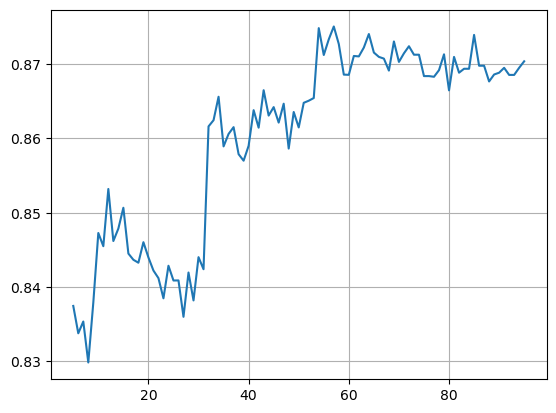

In [36]:
import matplotlib.pyplot as plt
plt.plot(cv_scores[:,0],cv_scores[:,1]) # 퍼센트를 x축 , 성능점수를 Y축
plt.grid()
plt.show()

In [37]:
select = SelectPercentile(percentile=best_score[0])
select.fit(train_ft,target)
best_cols = select.get_feature_names_out()
train_ft = train_ft[best_cols]
test_ft = test_ft[best_cols]

In [38]:
from lightgbm import early_stopping
from sklearn.metrics import f1_score
model_list = [] # 폴드별 학습된 모델 담을 리스트
score_list = [] # 폴드별 검증 점수 담을 리스트
for tri,vai in cv.split(train_ft,target):
    # 학습
    x_train = train_ft.iloc[tri]
    y_train = target.iloc[tri]

    # 검증
    x_valid = train_ft.iloc[vai]
    y_valid = target.iloc[vai]

    # 모델 학습
    model = LGBMClassifier(random_state=SEED,n_estimators=1000, verbosity=-1)
    model.fit(x_train,
              y_train,
              eval_set = [(x_valid,y_valid)], # 부스팅단계별로 검증셋에대한 평가 실시
              callbacks = [early_stopping(300)]) # 검증셋에 대하여 300번 연속으로 개선이 없을시 부스팅 중지


    pred = model.predict(x_valid) # f1 점수 확인하기 위해 예측
    score = f1_score(y_valid,pred) # 검증셋 f1 점수
    score_list.append(score) # 폴드별 검증점수 저장
    model_list.append(model) # 폴드별 학습된 모델 저장

Training until validation scores don't improve for 300 rounds
Early stopping, best iteration is:
[31]	valid_0's binary_logloss: 0.101067
Training until validation scores don't improve for 300 rounds
Early stopping, best iteration is:
[38]	valid_0's binary_logloss: 0.0797644
Training until validation scores don't improve for 300 rounds
Early stopping, best iteration is:
[53]	valid_0's binary_logloss: 0.0714496
Training until validation scores don't improve for 300 rounds
Early stopping, best iteration is:
[48]	valid_0's binary_logloss: 0.0813906
Training until validation scores don't improve for 300 rounds
Early stopping, best iteration is:
[55]	valid_0's binary_logloss: 0.0909273


In [39]:
print(score_list)
np.mean(score_list) # 검증점수 평균

[0.8541666666666666, 0.8900523560209425, 0.8911917098445595, 0.8743718592964824, 0.8730964467005076]


0.8765758077058317

In [40]:
pred_list = [] # fold 별 학습된 모델의 테스트 데에터에 대한 예측을 담을 리스트
for model in model_list:
    pred = model.predict_proba(test_ft)[:,1] # 1에 대한 확률을 저장하여 soft voting을 한다.
    pred_list.append(pred)

In [41]:
pred = np.mean(pred_list,axis=0) # 산술평균
pred = (pred > 0.4).astype(int) # 0 또는 1 값으로 변경
pred

array([0, 0, 0, ..., 1, 0, 0])

In [42]:
submit = pd.read_csv(f"{DATA_PATH}sample_submission.csv")
submit

,ID,target
0,test_0,NaN
1,test_1,NaN
2,test_2,NaN
3,test_3,NaN
4,test_4,NaN
...,...,...
3451,test_3451,NaN
3452,test_3452,NaN
3453,test_3453,NaN
3454,test_3454,NaN


In [43]:
submit["target"] = pred
submit

,ID,target
0,test_0,0
1,test_1,0
2,test_2,0
3,test_3,0
4,test_4,0
...,...,...
3451,test_3451,0
3452,test_3452,0
3453,test_3453,1
3454,test_3454,0


In [45]:
submit.to_csv("submit_임태균_0624_04.csv",index=False) # 인덱스는 제외하기 위해 False